In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
IMDB_ratings = pd.read_csv('movie_books_IMDB_ratings.csv', index_col=0)

In [3]:
GR_ratings = pd.read_csv('movie_books_GR_ratings.csv', index_col=0)

In [4]:
MC_ratings = pd.read_csv('movie_books_MC_ratings.csv', index_col=0)

In [5]:
print(IMDB_ratings.head())

                                 Title  IMDBRating  IMDBRatingCount
0                       Hababam Sinifi         9.4            23692
1                        The Godfather         9.2          1091878
2  National Theatre Live: Frankenstein         9.1             1080
3               The Godfather: Part II         9.0           742243
4         Hababam Sinifi Sinifta Kaldi         9.0            14722


In [6]:
print(GR_ratings.head())

                                           Title  GRRating  GRRatingCount
0                                 Hababam Sinifi      4.28            713
1                                  The Godfather      4.34         231557
2                         The Godfather: Part II      4.50              4
3                                     Fight Club      4.19         330059
4  The Lord of the Rings: The Return of the King      4.16             82


In [7]:
print(MC_ratings.head())

                                               Title  MCUserRating  \
0                                      The Godfather           9.1   
1                             The Godfather: Part II           9.1   
2                                         Fight Club           9.0   
3      The Lord of the Rings: The Return of the King           9.0   
4  The Lord of the Rings: The Fellowship of the Ring           9.0   

   MCUserRatingCount  MCCriticRating  MCCriticRatingCount  
0               1771             100                   14  
1                465              80                   10  
2               1238              66                   35  
3               2444              94                   41  
4               1608              92                   34  


## Compare IMDB ratings against GR ratings

In [8]:
IMDB_GR_data = pd.merge(IMDB_ratings, GR_ratings, on='Title')

In [9]:
#print(IMDB_GR_data)

In [10]:
IMDB_GR_user_ratings = IMDB_GR_data[['Title', 'IMDBRating', 'GRRating']]

In [11]:
IMDB_GR_user_ratings = IMDB_GR_user_ratings.sort_values(by='GRRating', ascending=True)

In [12]:
IMDB_GR_user_ratings = IMDB_GR_user_ratings[IMDB_GR_user_ratings.GRRating > 0]

(2, 5)

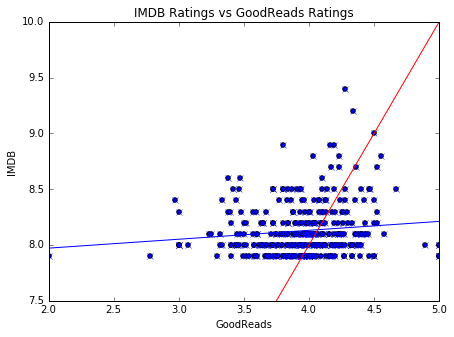

In [27]:
IMDB_GR_user_ratings.plot(x='GRRating', y='IMDBRating', kind='scatter', figsize=(7,5))

fit = np.polyfit(IMDB_GR_user_ratings['GRRating'], IMDB_GR_user_ratings['IMDBRating'], 1)
line = np.poly1d(fit)
xpoints = np.linspace(0.0, 5.0, 100)
plt.plot(IMDB_GR_user_ratings['GRRating'], IMDB_GR_user_ratings['IMDBRating'], 'x', xpoints, line(xpoints),'-',color='b')

defaultx = [float(x)/2 for x in range(0,11)]
defaulty = list(range(0,11))
plt.plot(defaultx,defaulty,color='r')


plt.title("IMDB Ratings vs GoodReads Ratings")
plt.xlabel('GoodReads')
plt.ylabel('IMDB')
plt.ylim([7.5,10])
plt.xlim([2,5])

In [14]:
print(fit)

[ 0.07987364  7.81213676]


## Compare MC user ratings against GR user ratings

In [15]:
MC_GR_data = pd.merge(MC_ratings, GR_ratings, on='Title')

In [16]:
MC_GR_user_ratings = MC_GR_data[['Title', 'MCUserRating', 'GRRating']]

In [17]:
MC_GR_user_ratings = MC_GR_user_ratings.sort_values(by='GRRating', ascending=True)

In [18]:
MC_GR_user_ratings = MC_GR_user_ratings[MC_GR_user_ratings.GRRating > 0]

In [19]:
MC_GR_user_ratings = MC_GR_user_ratings.dropna()

In [20]:
#print(MC_GR_user_ratings)

(2, 5)

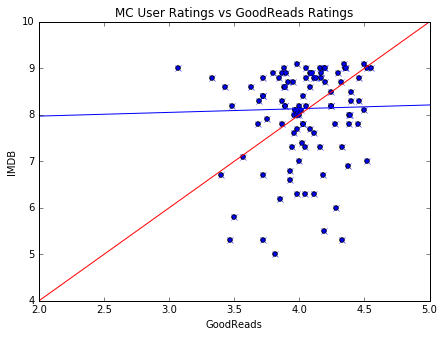

In [26]:
MC_GR_user_ratings.plot(x='GRRating', y='MCUserRating', kind='scatter', figsize=(7,5))

MC_GR_fit = np.polyfit(MC_GR_user_ratings['GRRating'], MC_GR_user_ratings['MCUserRating'], 1)
line2 = np.poly1d(MC_GR_fit)
xpoints2 = np.linspace(0.0, 5.0, 100)
plt.plot(MC_GR_user_ratings['GRRating'], MC_GR_user_ratings['MCUserRating'], 'x', xpoints2, line(xpoints),'-', color='b')

defaultx = [float(x)/2 for x in range(0,11)]
defaulty = list(range(0,11))
plt.plot(defaultx,defaulty,color='r')


plt.title("MC User Ratings vs GoodReads Ratings")
plt.xlabel('GoodReads')
plt.ylabel('IMDB')
plt.ylim([4,10])
plt.xlim([2,5])

In [22]:
print(MC_GR_fit)

[ 0.52076291  5.86677514]
